## Avaliando datasets modificados pelo bert_tokenizer (sem oov)
##### Configurações

- bert base neuralmind, com log_softmax, z_score, exp(z_score) e bert_score (score default do bert)
    - log_softmax:
        * sentença 1: [MASK,...,b] - retorna todos os valores do vocabulario, aplica logsoftmax e pega o valor a

        * sentença 2: [a,...,MASK] - retorna todos os valores do vocabulario, aplica logsoftmax e pega o valor b

    - z_score: constrói várias sentenças e pega o score delas e soma (para cada padrão). usa o score bert (semelhante à sentença 1 e 2 sem utilizar log_softmax), soma e divide pelo z_score
    - z_score_exp: constrói várias sentenças e pega o score delas, aplica EXP() e soma (para cada padrão). usa o score bert (semelhante à sentença 1 e 2 sem utilizar log_softmax), aplica EXP() em cada valor, soma e divide pelo z_score_exp
 :
- todos os tokens do dataset têm tamanho 1
- tamanho corpus (para comparação): 240M
- 240M N=574 True=276

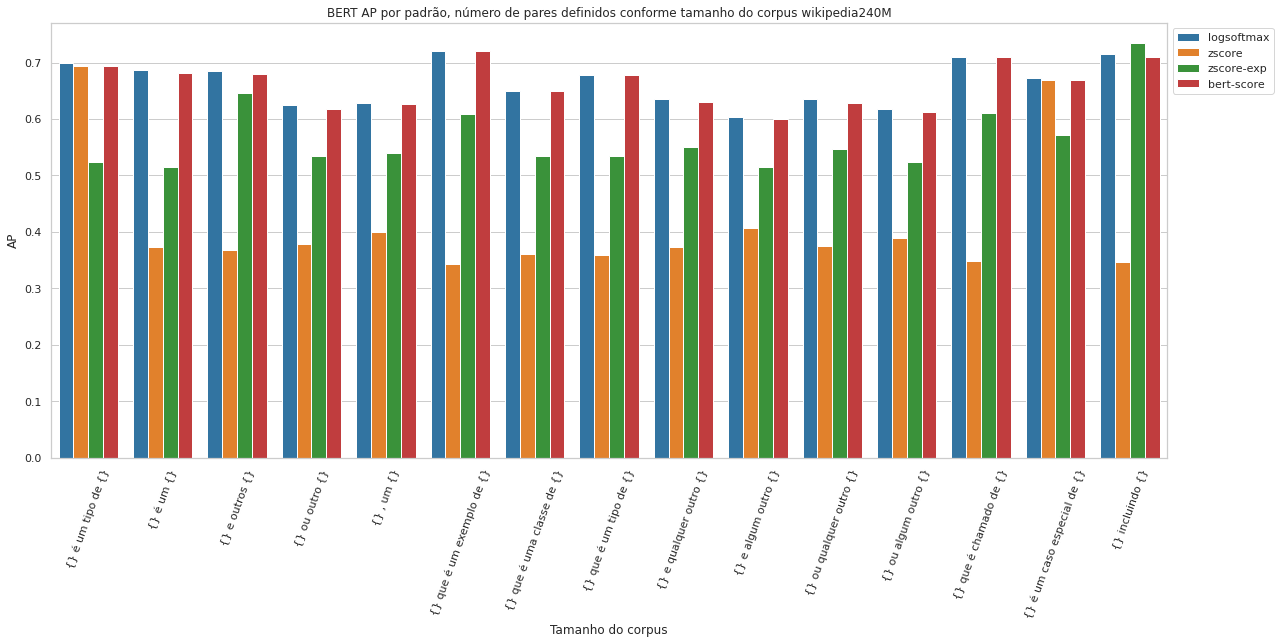

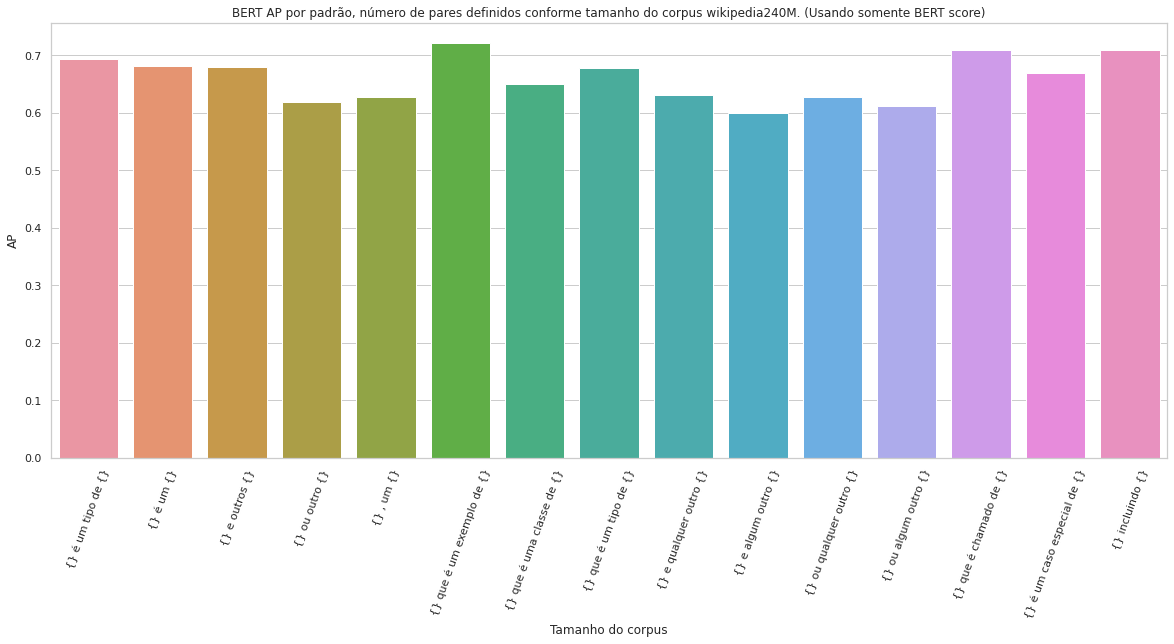

Melhores padrões usando apenas bert-score são:
	{} que é um exemplo de {}
	{} incluindo {}
	{} que é chamado de {}
	{} é um tipo de {}


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("tab10"))

path = ["../results/neuralmind-bert-base-portuguese-cased_logsoftmax_by-pattern/result.tsv",
        "../results/neuralmind-bert-base-portuguese-cased_zscore_by-pattern/result.tsv",
        "../results/neuralmind-bert-base-portuguese-cased_zscore-exp_by-pattern/result.tsv",
        "../results/neuralmind-bert-base-portuguese-cased_bert-score_by-pattern/result.tsv"]
df_array = []
for p in path:
    df = pd.read_csv(p, delimiter="\t")
    df['function'] = p.split("/")[-2].split("_")[1]
    df_array.append(df)

df_all = pd.concat(df_array)
df_all = df_all[(df_all['method'] == "all_subword") & (df_all['corpus'] == "wikipedia240M")]

plt.figure(figsize=(20,8))
ax = sns.barplot(x="pattern", y="AP", hue="function", data=df_all)
ax.legend(bbox_to_anchor=(1, 1))
ax.set(xlabel="Tamanho do corpus")
ax.set_title(f"BERT AP por padrão, número de pares definidos conforme tamanho do corpus wikipedia240M")
plt.xticks(rotation=70)
plt.show()

df_all = df_all[df_all['function'] == "bert-score"]

plt.figure(figsize=(20,8))
ax = sns.barplot(x="pattern", y="AP", data=df_all)
ax.set(xlabel="Tamanho do corpus")
ax.set_title(f"BERT AP por padrão, número de pares definidos conforme tamanho do corpus wikipedia240M. (Usando somente BERT score)")
plt.xticks(rotation=70)
plt.show()

df_all.sort_values(by="AP", ascending=False, inplace=True)
best_patterns = df_all['pattern'].iloc[:4]
best_patterns = best_patterns.tolist()

print("Melhores padrões usando apenas bert-score são:")
for p in best_patterns:
    print(f"\t{p}")

